Import required Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Import the Data

In [5]:
df = pd.read_excel('../data/Week1_challenge_data_source.xlsx')

In [6]:
# Get data overview
df.head(3)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0


Data Exploration

In [7]:
df.shape
# number of data points
print(f" There are {df.shape[0]} rows and {df.shape[1]} columns")

 There are 150001 rows and 55 columns


In [8]:
df.describe()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.490100e+05,150000.000000,150000.000000,1.500000e+05,1.494310e+05,1.489350e+05,1.494290e+05,122172.000000,122189.000000,150000.000000,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05
mean,1.013887e+19,499.188200,498.800880,1.046086e+05,2.082016e+14,4.188282e+10,4.847455e+13,109.795706,17.662883,13300.045927,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,2.893173e+18,288.611834,288.097653,8.103762e+04,2.148809e+10,2.447443e+12,2.241637e+13,619.782739,84.793524,23971.878541,...,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127639e+07,2.441429e+08
min,6.917538e+18,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,7.349883e+18,250.000000,251.000000,5.744050e+04,2.082014e+14,3.365130e+10,3.546071e+13,32.000000,2.000000,43.000000,...,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322201e+07,2.431068e+08
50%,7.349883e+18,499.000000,500.000000,8.639900e+04,2.082015e+14,3.366371e+10,3.572201e+13,45.000000,5.000000,63.000000,...,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114331e+07,4.558411e+08
75%,1.304243e+19,749.000000,750.000000,1.324302e+05,2.082018e+14,3.368349e+10,8.611970e+13,70.000000,15.000000,19710.750000,...,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,6.657055e+08
max,1.318654e+19,999.000000,999.000000,1.859336e+06,2.140743e+14,8.823971e+14,9.900120e+13,96923.000000,7120.000000,378160.000000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08


Fields	Description 


bearer id	xDr session identifier 

Dur. (ms)	Total Duration of the xDR (in ms)

Start	Start time of the xDR (first frame timestamp)

Start ms	Milliseconds offset of start time for the xDR (first frame timestamp)

End	End time of the xDR (last frame timestamp)

End ms	Milliseconds offset of end time of the xDR (last frame timestamp)

Dur. (s)	Total Duration of the xDR (in s)

IMSI	International Mobile Subscriber Identity

MSISDN/Number	MS International PSTN/ISDN Number of mobile - customer number

IMEI	International Mobile Equipment Identity

Last Location Name	User location call name (2G/3G/4G) at the end of the bearer

Avg RTT DL (ms)	Average Round Trip Time measurement Downlink direction (msecond)

Avg RTT UL (ms)	Average Round Trip Time measurement Uplink direction (msecond)

Avg Bearer TP DL (kbps)	Average Bearer Throughput for Downlink (kbps) - based on BDR duration

Avg Bearer TP UL (kbps)	Average Bearer Throughput for uplink (kbps) - based on BDR duration

TCP DL Retrans. Vol (Bytes)	TCP volume of Downlink packets detected as retransmitted (bytes)

TCP UL Retrans. Vol (Bytes)	TCP volume of Uplink packets detected as retransmitted (bytes)

DL TP < 50 Kbps (%)	Duration ratio when Bearer Downlink Throughput < ….

50 Kbps < DL TP < 250 Kbps (%)	Duration ratio when Bearer Downlink Throughput range is …

250 Kbps < DL TP < 1 Mbps (%)	Duration ratio when Bearer Downlink Throughput range is …

DL TP > 1 Mbps (%)	Duration ratio when Bearer Downlink Throughput > ….

UL TP < 10 Kbps (%)	Duration ratio when Bearer Uplink Throughput < ….

10 Kbps < UL TP < 50 Kbps (%)	Duration ratio when Bearer Uplink Throughput range is …

50 Kbps < UL TP < 300 Kbps (%)	Duration ratio when Bearer Uplink Throughput range is …

UL TP > 300 Kbps (%)	Duration ratio when Bearer Uplink Throughput > ….

HTTP DL (Bytes)	HTTP data volume (in Bytes) received by the MS during this session

HTTP UL (Bytes)	HTTP data volume (in Bytes) sent by the MS during this session

Activity Duration DL (ms)	Activity Duration for downlink (ms) - excluding periods of inactivity > 500 ms

Activity Duration UL (ms)	Activity Duration for uplink (ms) - excluding periods of inactivity > 500 ms

Dur. (ms).1	Total Duration of the xDR (in ms)

Handset Manufacturer	Handset manufacturer 

Handset Type	Handset type of the mobile device

Nb of sec with 125000B < Vol DL	Number of seconds with IP Volume DL >

Nb of sec with 1250B < Vol UL < 6250B	Number of seconds with IP Volume UL between …

Nb of sec with 31250B < Vol DL < 125000B	Number of seconds with IP Volume DL between …

Nb of sec with 37500B < Vol UL	Number of seconds with IP Volume UL >

Nb of sec with 6250B < Vol DL < 31250B	Number of seconds with IP Volume DL between …

Nb of sec with 6250B < Vol UL < 37500B	Number of seconds with IP Volume UL between …

Nb of sec with Vol DL < 6250B	Number of seconds with IP Volume DL <

Nb of sec with Vol UL < 1250B	Number of seconds with IP Volume UL <

Social Media DL (Bytes)	Social Media data volume (in Bytes) received by the MS during this session

Social Media UL (Bytes)	Social Media data volume (in Bytes) sent by the MS during this session

YouTube DL (Bytes)	YouTube data volume (in Bytes) received by the MS during this session

YouTube UL (Bytes)	YouTube data volume (in Bytes) sent by the MS during this session

Netflix DL (Bytes)	Netflix data volume (in Bytes) received by the MS during this session

Netflix UL (Bytes)	Netflix data volume (in Bytes) sent by the MS during this session

Google DL (Bytes)	Google data volume (in Bytes) Received by the MS during this session

Google UL (Bytes)	Google data volume (in Bytes) sent by the MS during this session

Email DL (Bytes)	Email data volume (in Bytes) Received by the MS during this session

Email UL (Bytes)	Email data volume (in Bytes) sent by the MS during this session

Gaming DL (Bytes)	Gaming data volume (in Bytes) Received by the MS during this session

Gaming UL (Bytes)	Gaming data volume (in Bytes) sent by the MS during this session

Other DL	Other data volume (in Bytes) received by the MS during this session


Other UL	Other data volume (in Bytes) sent by the MS during this session

Total DL (Bytes)	Data volume (in Bytes) received by the MS during this session (IP layer + overhead)

Total UL (Bytes)	Data volume (in Bytes) sent by the MS during this session (IP layer + overhead)

In [9]:
# Get column names
df.columns.tolist()

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Socia

In [10]:
# Count missing values
df.isna().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 149010 non-null  float64       
 1   Start                                     150000 non-null  datetime64[ns]
 2   Start ms                                  150000 non-null  float64       
 3   End                                       150000 non-null  datetime64[ns]
 4   End ms                                    150000 non-null  float64       
 5   Dur. (ms)                                 150000 non-null  float64       
 6   IMSI                                      149431 non-null  float64       
 7   MSISDN/Number                             148935 non-null  float64       
 8   IMEI                                      149429 non-null  float64       
 9   Last Location N

Check for duplicate

In [15]:
duplicated_entries = df[df.duplicated()]
duplicated_entries.shape

(0, 55)

In [17]:
# how many missing values exist or better still what is the % of missing values in the dataset?
def percent_missing(df):

    # Calculate total number of cells in dataframe
    totalCells = np.product(df.shape)

    # Count number of missing values per column
    missingCount = df.isnull().sum()

    # Calculate total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    print("The telecom dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

percent_missing(df)

The telecom dataset contains 12.5 % missing values.


In [18]:
df.skew(axis=0, skipna=True)

/tmp/ipykernel_7187/3081074228.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew(axis=0, skipna=True)


Bearer Id                                     0.026666
Start ms                                      0.000968
End ms                                       -0.001163
Dur. (ms)                                     3.952609
IMSI                                         41.045956
MSISDN/Number                               332.155856
IMEI                                          1.071470
Avg RTT DL (ms)                              62.907828
Avg RTT UL (ms)                              28.457415
Avg Bearer TP DL (kbps)                       2.589437
Avg Bearer TP UL (kbps)                       4.503413
TCP DL Retrans. Vol (Bytes)                  15.951809
TCP UL Retrans. Vol (Bytes)                  84.113393
DL TP < 50 Kbps (%)                          -2.297803
50 Kbps < DL TP < 250 Kbps (%)                3.271453
250 Kbps < DL TP < 1 Mbps (%)                 4.566158
DL TP > 1 Mbps (%)                            5.370351
UL TP < 10 Kbps (%)                          -8.985016
10 Kbps < 

This distribution has skew 332.1558558193963
This distribution has kurtosis 115844.50542866594


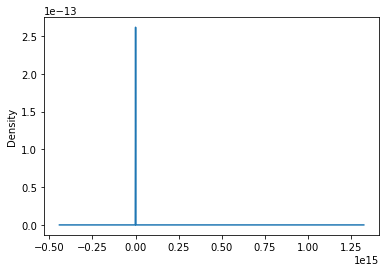

In [28]:
df['MSISDN/Number'].plot(kind='density')
print('This distribution has skew', df['MSISDN/Number'].skew())
print('This distribution has kurtosis', df['MSISDN/Number'].kurt())

array([[<AxesSubplot:title={'center':'Bearer Id'}>,
        <AxesSubplot:title={'center':'Start'}>,
        <AxesSubplot:title={'center':'Start ms'}>,
        <AxesSubplot:title={'center':'End'}>,
        <AxesSubplot:title={'center':'End ms'}>,
        <AxesSubplot:title={'center':'Dur. (ms)'}>,
        <AxesSubplot:title={'center':'IMSI'}>],
       [<AxesSubplot:title={'center':'MSISDN/Number'}>,
        <AxesSubplot:title={'center':'IMEI'}>,
        <AxesSubplot:title={'center':'Avg RTT DL (ms)'}>,
        <AxesSubplot:title={'center':'Avg RTT UL (ms)'}>,
        <AxesSubplot:title={'center':'Avg Bearer TP DL (kbps)'}>,
        <AxesSubplot:title={'center':'Avg Bearer TP UL (kbps)'}>,
        <AxesSubplot:title={'center':'TCP DL Retrans. Vol (Bytes)'}>],
       [<AxesSubplot:title={'center':'TCP UL Retrans. Vol (Bytes)'}>,
        <AxesSubplot:title={'center':'DL TP < 50 Kbps (%)'}>,
        <AxesSubplot:title={'center':'50 Kbps < DL TP < 250 Kbps (%)'}>,
        <AxesSubplot:title=

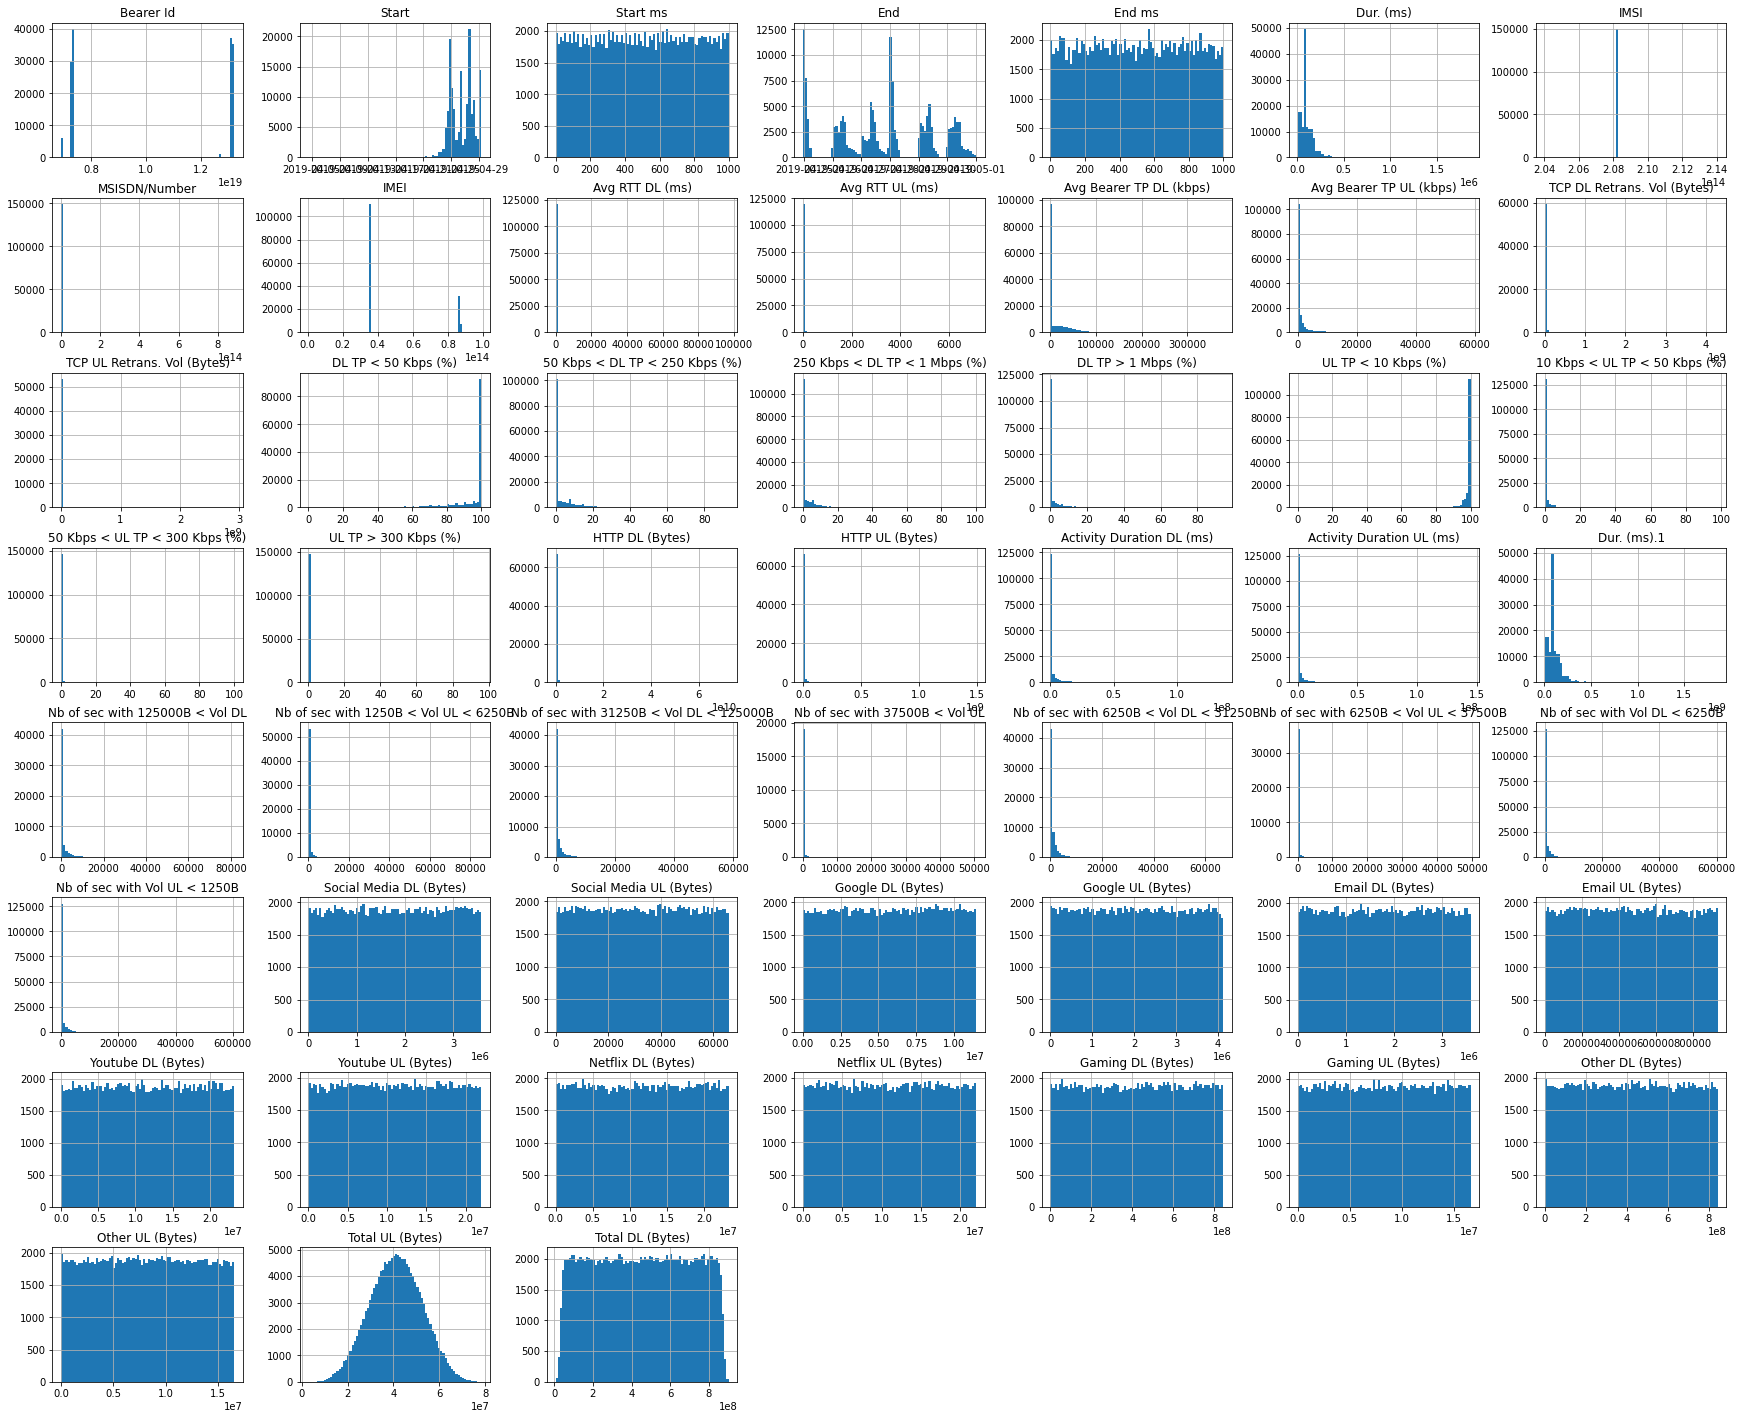

In [32]:
df.hist(bins=80, figsize=(30,25))

Eliminate automatically variables with more than 20% of missingness

In [34]:
# Eliminate automatically variables with more than 20% of missingness
df_before_filling= df
df = df[df.columns[df.isnull().mean() < 0.2]]

In [35]:
missing_cols=df.columns[df.isnull().mean() > 0]
print(missing_cols)

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1',
       'Handset Manufacturer', 'Handset Type', 'Nb of sec with Vol DL < 6250B',
       'Nb of sec with Vol UL < 1250B', 'Total UL (Bytes)',
       'Total DL (Bytes)'],
      dtype='object')


In [37]:
df['Avg RTT DL (ms)'].isnull().mean()

0.1855254298304678

In [38]:
print(len(missing_cols))

31


Imputation : Filling missing values in a variable by reasonable approximations using median of the variable to allow machine learning models to work


Impute Numeric Variables with median of the variable

In [39]:
df_single= df
cols= df_single.columns
num_cols = df_single.select_dtypes(include=np.number).columns
df_single.loc[:,num_cols]=df_single.loc[:,num_cols].fillna(df_single.loc[:,num_cols].median())
print(num_cols)
print(df_single.loc[:,num_cols].median())

Index(['Bearer Id', 'Start ms', 'End ms', 'Dur. (ms)', 'IMSI', 'MSISDN/Number',
       'IMEI', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)',
       'Avg Bearer TP UL (kbps)', 'DL TP < 50 Kbps (%)',
       '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)',
       'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)',
       '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)',
       'UL TP > 300 Kbps (%)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1',
       'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B',
       'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
       'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)',
       'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
       'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)',
       'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)',
       'Total UL (Bytes)', 'Total DL (Bytes)'],
      dtyp

/home/jedi/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1884: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


Impute Categorical Variables with mode of the variable


In [41]:
cat_cols= list(set(cols) - set(num_cols))
df_single.loc[:,cat_cols] = df_single.loc[:,cat_cols].fillna(df.loc[:,cat_cols].mode().iloc[0])
train_cols = df_single.columns
print(cat_cols)
print(df_single.loc[:,cat_cols].mode().iloc[0])

['Last Location Name', 'End', 'Handset Manufacturer', 'Start', 'Handset Type']
Last Location Name                  D41377B
End                     2019-04-25 00:01:32
Handset Manufacturer                  Apple
Start                   2019-04-29 07:08:38
Handset Type               Huawei B528S-23A
Name: 0, dtype: object


/home/jedi/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1884: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


Check if missingness is now 0 for all variables remaining

In [43]:
df_single.columns[df_single.isnull().mean() > 0] # select those variables with missing values
# empty column list indicates no variable has missing values anymore!

Index([], dtype='object')

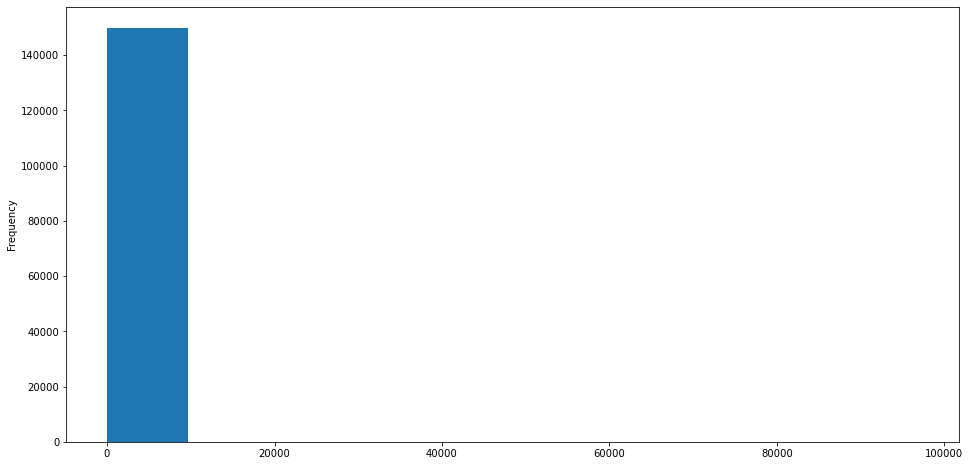

In [44]:
df_single['Avg RTT DL (ms)'].plot.hist(figsize=(16,8));

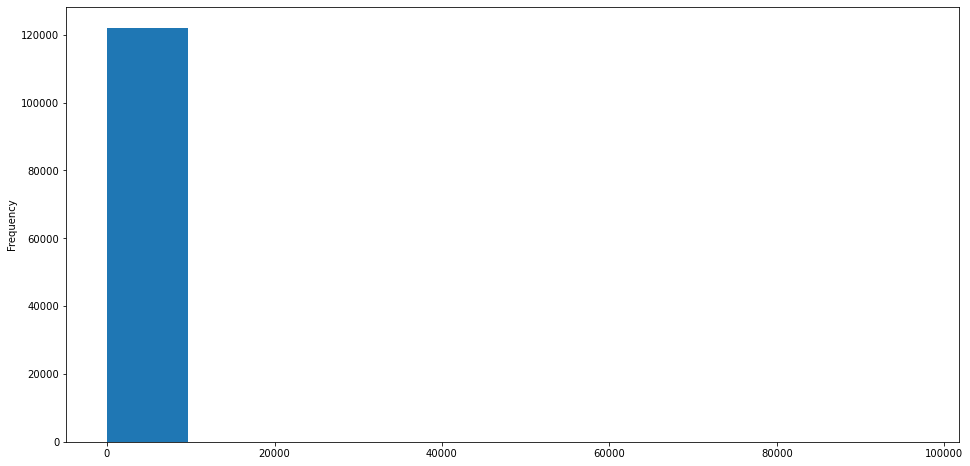

In [45]:
df_before_filling['Avg RTT DL (ms)'].plot.hist(figsize=(16,8));

In [47]:
df_single.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 45 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Bearer Id                       150001 non-null  float64       
 1   Start                           150001 non-null  datetime64[ns]
 2   Start ms                        150001 non-null  float64       
 3   End                             150001 non-null  datetime64[ns]
 4   End ms                          150001 non-null  float64       
 5   Dur. (ms)                       150001 non-null  float64       
 6   IMSI                            150001 non-null  float64       
 7   MSISDN/Number                   150001 non-null  float64       
 8   IMEI                            150001 non-null  float64       
 9   Last Location Name              150001 non-null  object        
 10  Avg RTT DL (ms)                 150001 non-null  float64

In [49]:
df_single.isna().sum()

Bearer Id                         0
Start                             0
Start ms                          0
End                               0
End ms                            0
Dur. (ms)                         0
IMSI                              0
MSISDN/Number                     0
IMEI                              0
Last Location Name                0
Avg RTT DL (ms)                   0
Avg RTT UL (ms)                   0
Avg Bearer TP DL (kbps)           0
Avg Bearer TP UL (kbps)           0
DL TP < 50 Kbps (%)               0
50 Kbps < DL TP < 250 Kbps (%)    0
250 Kbps < DL TP < 1 Mbps (%)     0
DL TP > 1 Mbps (%)                0
UL TP < 10 Kbps (%)               0
10 Kbps < UL TP < 50 Kbps (%)     0
50 Kbps < UL TP < 300 Kbps (%)    0
UL TP > 300 Kbps (%)              0
Activity Duration DL (ms)         0
Activity Duration UL (ms)         0
Dur. (ms).1                       0
Handset Manufacturer              0
Handset Type                      0
Nb of sec with Vol DL < 6250

In [ ]:
# TODO
sns.pairplot(df)